In [2]:
import pandas as pd
scale = 1
accuracy_df = pd.DataFrame(columns=['scale', 'top1', 'top2', 'top3', 'top4', 'top5'])
for _ in range(11):
    prediction_res = pd.read_csv(f'{scale}_test_result.csv')
    prediction_res['top1_hit'] = prediction_res['True phone'] == prediction_res['1st predicted phone']
    # add a new variable top1_hit to prediction_res
    # where top1_hit is true if the true phone is the same as the 2st predicted phone or top1_hit = True
    prediction_res['top2_hit'] = (prediction_res['True phone'] == prediction_res['2nd predicted phone']) | prediction_res['top1_hit']
    prediction_res['top3_hit'] = (prediction_res['True phone'] == prediction_res['3rd predicted phone']) | prediction_res['top2_hit']
    prediction_res['top4_hit'] = (prediction_res['True phone'] == prediction_res['4th predicted phone']) | prediction_res['top3_hit']
    prediction_res['top5_hit'] = (prediction_res['True phone'] == prediction_res['5th predicted phone']) | prediction_res['top4_hit']
    # get the sum of top1_hit, top2_hit, top3_hit, top4_hit, top5_hit
    top1_hit = prediction_res['top1_hit'].sum()
    print(f"top1 accuracy is {top1_hit/len(prediction_res)}")
    top2_hit = prediction_res['top2_hit'].sum()
    print(f"top2 accuracy is {top2_hit/len(prediction_res)}")
    top3_hit = prediction_res['top3_hit'].sum()
    print(f"top3 accuracy is {top3_hit/len(prediction_res)}")
    top4_hit = prediction_res['top4_hit'].sum()
    print(f"top4 accuracy is {top4_hit/len(prediction_res)}")
    top5_hit = prediction_res['top5_hit'].sum()
    print(f"top5 accuracy is {top5_hit/len(prediction_res)}")
    # add the result to accuracy_df
    accuracy_df.loc[len(accuracy_df)] = [scale, top1_hit/len(prediction_res), top2_hit/len(prediction_res), top3_hit/len(prediction_res), top4_hit/len(prediction_res), top5_hit/len(prediction_res)]
    scale /= 2

top1 accuracy is 0.467
top2 accuracy is 0.653
top3 accuracy is 0.739
top4 accuracy is 0.809
top5 accuracy is 0.853
top1 accuracy is 0.456
top2 accuracy is 0.643
top3 accuracy is 0.742
top4 accuracy is 0.796
top5 accuracy is 0.837
top1 accuracy is 0.442
top2 accuracy is 0.643
top3 accuracy is 0.74
top4 accuracy is 0.793
top5 accuracy is 0.835
top1 accuracy is 0.407
top2 accuracy is 0.604
top3 accuracy is 0.706
top4 accuracy is 0.77
top5 accuracy is 0.823
top1 accuracy is 0.391
top2 accuracy is 0.588
top3 accuracy is 0.678
top4 accuracy is 0.742
top5 accuracy is 0.799
top1 accuracy is 0.37
top2 accuracy is 0.559
top3 accuracy is 0.665
top4 accuracy is 0.737
top5 accuracy is 0.78
top1 accuracy is 0.35
top2 accuracy is 0.53
top3 accuracy is 0.656
top4 accuracy is 0.72
top5 accuracy is 0.764
top1 accuracy is 0.269
top2 accuracy is 0.436
top3 accuracy is 0.548
top4 accuracy is 0.625
top5 accuracy is 0.684
top1 accuracy is 0.269
top2 accuracy is 0.39
top3 accuracy is 0.477
top4 accuracy is 0.

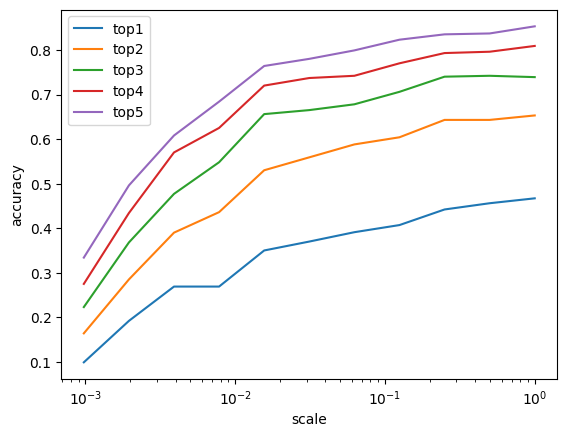

In [3]:
# draw the line chart for top1, top2, top3, top4, top5 accuracy and have the x-axis log scale
import matplotlib.pyplot as plt
plt.plot(accuracy_df['scale'], accuracy_df['top1'], label='top1')
plt.plot(accuracy_df['scale'], accuracy_df['top2'], label='top2')
plt.plot(accuracy_df['scale'], accuracy_df['top3'], label='top3')
plt.plot(accuracy_df['scale'], accuracy_df['top4'], label='top4')
plt.plot(accuracy_df['scale'], accuracy_df['top5'], label='top5')
plt.legend()
plt.xscale('log')
plt.xlabel('scale')
plt.ylabel('accuracy')
plt.show()
